In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Introducción

## ¿Qué es una red neuronal?

Una red neuronal es un modelo matemático inspirado en el funcionamiento del cerebro humano, diseñado para procesar información y aprender patrones a partir de datos. Estas redes son fundamentales en el campo del aprendizaje automático (machine learning) y son ampliamente utilizadas en tareas como reconocimiento de imágenes, procesamiento de lenguaje natural y predicción de datos.

### Componentes principales:

- Neuronas artificiales: Las neuronas son las unidades básicas de las redes neuronales. Reciben entradas, las procesan aplicando una función matemática, y producen una salida. Cada neurona tiene:
  - **Pesos** ($w_i$): indican la importancia de cada entrada;
  - **Sesgo** ($b$): un valor constante que ayuda a ajustar el modelo.
  - **Función de activación**: decide si la neurona se "activa" o no para transmitir la información a las siguientes capas.

La formula general es $z = w_1x_1+w_2x_2+ \dots +w_m x_m + b$ y $salida=activación\left(z\right)$.

- Capas: Las redes neuronales están organizadas en capas:
    * Capa de entrada: donde los datos iniciales ingresan al modelo.
    * Capas ocultas: procesan la información, aprendiendo patrones complejos.
    * Capa de salida: entrega el resultado final (por ejemplo, una categoría o un valor numérico).

- Conexiones entre neuronas: Las neuronas de una capa están conectadas con las de la siguiente mediante **pesos**. Los pesos se ajustan durante el entrenamiento para mejorar la precisión del modelo en una tarea específica.


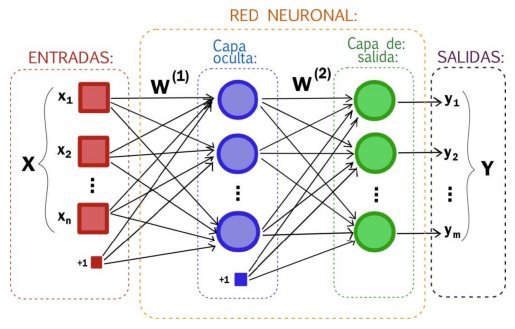

In [4]:
img = mpimg.imread('nn1.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

## ¿Cómo aprenden las redes neuronales?

El aprendizaje en una red neuronal ocurre mediante un proceso llamado propagación hacia atrás (*backpropagation*):

- Se calcula el error de las predicciones del modelo en comparación con los resultados reales.
- El error se utiliza para ajustar los pesos y los sesgos de la red mediante un algoritmo de optimización, como el descenso por gradiente.

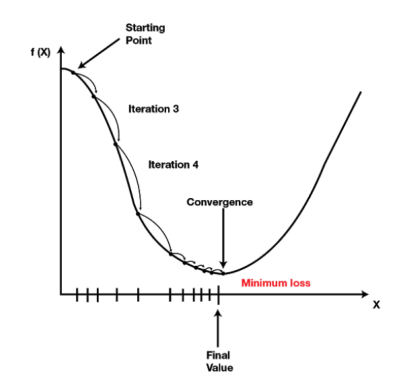

In [6]:
img = mpimg.imread('nn2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## Ejemplo de clasificación

* Genera un conjunto de datos como "lunas" o "círculos" usando make_moons o make_circles.
* Entrena una red neuronal con MLPClassifier de scikit-learn para separar las clases.


In [11]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")

Exactitud: 0.86


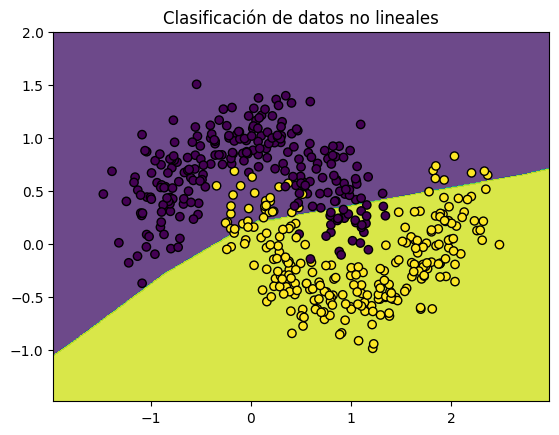

In [12]:
import numpy as np

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.title("Clasificación")
plt.show()

## Ejemplo de regresión

* Genera datos simulados de una función no lineal (p.ej., una parábola).
* Entrena una red neuronal con MLPRegressor para ajustarlos.

In [22]:
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.random.rand(100, 1) * 10  
y = 0.5 * X**2 - X + np.random.normal(0, 2, size=(100, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred):.2f}")

Error cuadrático medio: 22.32


/Users/pedroromeromartinez/anaconda3/envs/regresion/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pedroromeromartinez/anaconda3/envs/regresion/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


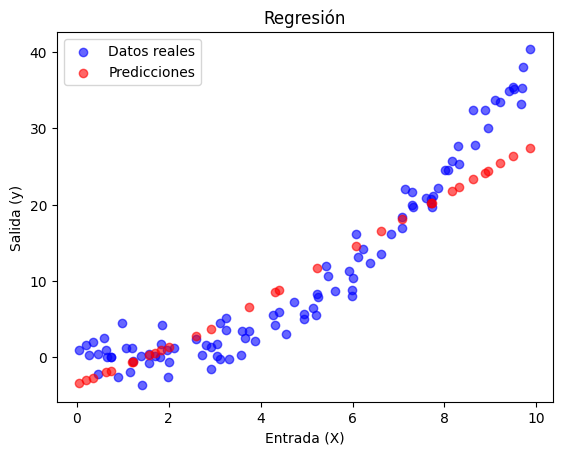

In [23]:
plt.scatter(X, y, label='Datos reales', color='blue', alpha=0.6)
plt.scatter(X_test, y_pred, label='Predicciones', color='red', alpha=0.6)
plt.title("Regresión")
plt.xlabel("Entrada (X)")
plt.ylabel("Salida (y)")
plt.legend()
plt.show()

# 2. Ajuste de hiperparámetros

En las redes neuronales implementadas con *MLPRegressor* o *MLPClassifier* de scikit-learn, los hiperparámetros controlan el comportamiento del modelo y afectan su desempeño en tareas de clasificación o regresión. A continuación, se explica cada uno de los hiperparámetros más relevantes:

- **hidden_layer_sizes**: Define el número de capas ocultas y la cantidad de neuronas en cada capa.
    - Una tupla, por ejemplo, (100,) para una sola capa con 100 neuronas, o (50, 30) para dos capas con 50 y 30 neuronas respectivamente.
    - Aumentar el número de capas/neuronas puede mejorar la capacidad del modelo para aprender patrones complejos, pero también puede causar sobreajuste o aumentar el tiempo de entrenamiento.
- **activation**: Especifica la función de activación que se aplica a las neuronas en las capas ocultas:
    * 'identity': Sin transformación (útil para regresión lineal).
    * 'logistic': Sigmoide, produce valores en el rango (0, 1).
    * 'tanh': Tangente hiperbólica, valores en el rango (-1, 1).
    * 'relu' (por defecto): Rectified Linear Unit, 'relu' es comúnmente utiliada porque es eficiente y evita problemas como el desvanecimiento del gradiente.
- **solver**: Algoritmo para optimizar los pesos de la red:
  - 'lbfgs': Un optimizador de segundo orden eficiente para conjuntos de datos pequeños.
  - 'sgd': Descenso de gradiente estocástico.
  - 'adam' (por defecto): Un optimizador robusto basado en el método de descenso de gradiente adaptativo.
  - 'adam' suele ser la mejor opción para la mayoría de los casos. 'sgd' permite ajustar parámetros como learning_rate, pero puede requerir más experimentación.
- **alpha**: Parámetro de regularización L2 (también conocida como ridge regularization). Un valor flotante (por defecto $0.0001$). Penaliza los pesos altos para prevenir sobreajuste. Valores más altos aumentan la regularización.
- **batch_size**: Tamaño de los lotes en los que se divide el conjunto de datos para el entrenamiento.
  - 'auto' (por defecto): Ajusta el tamaño automáticamente como $min\left\{200, n\_samples\right\}$.
  - Entero: Número fijo de muestras por lote.
- **learning_rate**: Controla cómo se ajustan los pesos durante el entrenamiento.
  - 'constant': Tasa de aprendizaje fija.
  - 'invscaling': Disminuye la tasa a medida que avanza el entrenamiento.
  - 'adaptive' (por defecto): Disminuye la tasa si el modelo deja de mejorar.
  - Una tasa muy alta puede impedir la convergencia; una muy baja puede hacer que el entrenamiento sea muy lento.
- **max_iter**: Número máximo de iteraciones durante el entrenamiento. Es un número entero (por defecto $200$).
- **tol**: Tolerancia para la detención anticipada basada en la mejora de la pérdida.
